# Exploracion de los datos

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#data reading
train_df = pd.read_csv('train.csv') #Modify this line

In [3]:
#Check amount of tarjet values
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']
for i in cols_target:
    print(train_df[i].value_counts())

0    151122
1      8449
Name: obscene, dtype: int64
0    151694
1      7877
Name: insult, dtype: int64
0    144277
1     15294
Name: toxic, dtype: int64
0    157976
1      1595
Name: severe_toxic, dtype: int64
0    158166
1      1405
Name: identity_hate, dtype: int64
0    159093
1       478
Name: threat, dtype: int64


<AxesSubplot:>

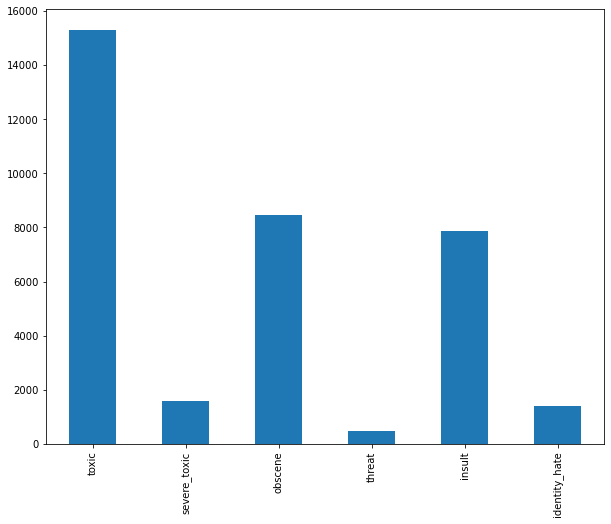

In [4]:
#Plot of tarjet values
toxic_comments_labels = train_df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
toxic_comments_labels.sum(axis=0).plot.bar()

In [7]:
# check for any 'null' comment
no_comment = train_df[train_df['comment_text'].isnull()]
len(no_comment)

0

In [16]:
unlabelled_in_all = train_df[(train_df['toxic']!=1) & (train_df['severe_toxic']!=1) & (train_df['obscene']!=1) & 
                            (train_df['threat']!=1) & (train_df['insult']!=1) & (train_df['identity_hate']!=1)]
print('Percentage of non toxic comments is', len(unlabelled_in_all)/len(train_df)*100)
print('No toxic', len(unlabelled_in_all))

Percentage of non toxic comments is 89.83211235124176
No toxic 143346


In [19]:
# let's see the percentage for the categories
print('Total rows in train is',(len(train_df)))
print(train_df[cols_target].sum()/len(train_df)*100)

Total rows in train is 159571
obscene          5.294822
insult           4.936361
toxic            9.584448
severe_toxic     0.999555
identity_hate    0.880486
threat           0.299553
dtype: float64


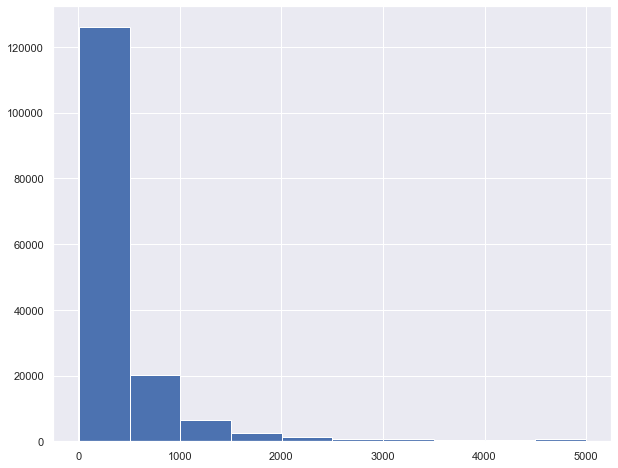

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: char_length, dtype: float64

In [20]:
# Let's look at the character length for the rows in the training data
train_df['char_length'] = train_df['comment_text'].apply(lambda x: len(str(x)))
# look at the histogram plot for text length
sns.set()
train_df['char_length'].hist()
plt.show()
train_df['char_length'].describe()

<AxesSubplot:title={'center':'Correlation of features & targets'}>

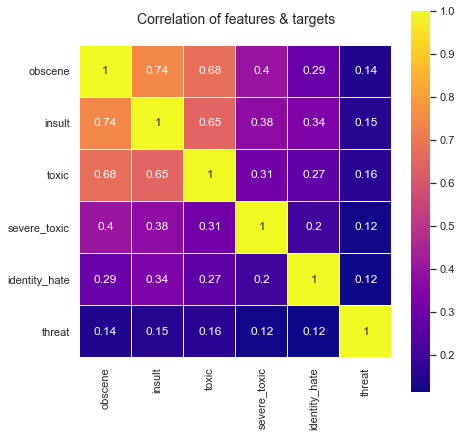

In [21]:
#Correlation of tarjet variables
data = train_df[cols_target]
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)